# Homework 4

In [61]:
from pandas import read_csv, get_dummies
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

## Data Reading

In [62]:
df = read_csv('./datasets/homework/hotel_reservations.csv')


categorical_columns = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'booking_status']
df.drop(columns=categorical_columns, inplace=True)

df_attr = df.iloc[:,0:12]
df_class = df.iloc[:,12]

df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,11,0,0,0,94.50,0
5,2,0,0,2,0,346,2018,13,0,0,0,115.00,1
6,2,0,1,3,0,34,2017,15,0,0,0,107.55,1
7,2,0,1,3,0,83,2018,26,0,0,0,105.61,1
8,3,0,0,4,0,121,2018,6,0,0,0,96.90,1
9,2,0,0,5,0,44,2018,18,0,0,0,133.44,3


## KMeans

In [63]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df_attr)

### Labels

In [64]:
labelsFit = kmeans.labels_
labelsFit

array([2, 0, 0, ..., 1, 0, 2], dtype=int32)

### Prediction

In [65]:
labels_predict=kmeans.predict(df_attr)
labels_predict

array([2, 0, 0, ..., 1, 0, 2], dtype=int32)

### Centroids

In [66]:
centroids = kmeans.cluster_centers_
centroids

array([[1.80342235e+00, 1.14708731e-01, 7.55269591e-01, 2.02260043e+00,
        3.83284904e-02, 2.85475301e+01, 2.01778460e+03, 1.55893178e+01,
        4.15110004e-02, 3.51921037e-02, 2.50495826e-01, 1.04854183e+02],
       [1.91323065e+00, 1.10016263e-01, 9.28824261e-01, 2.48464556e+00,
        2.38209127e-02, 1.29280015e+02, 2.01786128e+03, 1.56196307e+01,
        2.00899263e-03, 7.07930738e-03, 1.21496221e-02, 1.03597164e+02],
       [1.89012316e+00, 4.39507365e-02, 8.02946148e-01, 2.44795943e+00,
        1.06254528e-02, 2.70830234e+02, 2.01790485e+03, 1.55800531e+01,
        2.17338807e-03, 2.41487563e-03, 1.69041294e-03, 9.54948515e+01]])

### Visualization

Text(0.5, 1.0, 'kMeans - Hotel Reservations')

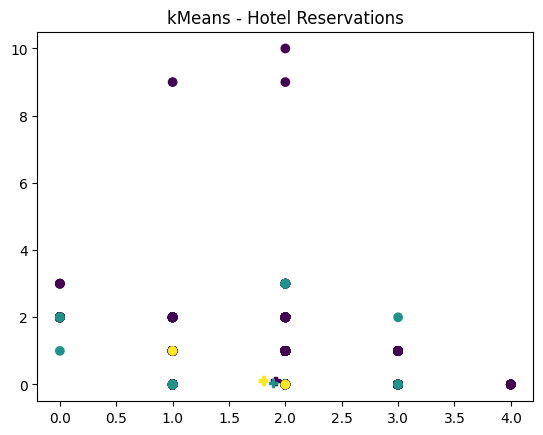

In [67]:
X = np.array(df_attr)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker="P", c=[2,0,1])
plt.title("kMeans - Hotel Reservations")

## Agglomerative algorithm

In [ ]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_attr)